In [57]:
import tensorflow as tf
import numpy as np
import os

In [66]:
(X_train, y_train), (X_test, y_test )=tf.keras.datasets.mnist.load_data()

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [68]:
shaped_x_train=X_train.reshape(60000,28,28,1)/255
shaped_x_test=X_test.reshape(10000,28,28,1)/255

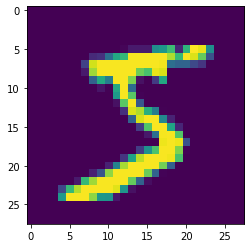

In [69]:
plt.imshow(shaped_x_train[0].reshape(28,28))

In [70]:
from tensorflow.keras.utils import to_categorical

In [72]:
con_y_train=to_categorical(y_train,num_classes=10)
con_y_test=to_categorical(y_test,num_classes=10)

In [74]:
y_train[0]

5

In [77]:
con_y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Building Model

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Dense,Conv2D,Flatten,Dropout,BatchNormalization

In [79]:
model1=Sequential()

model1.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),input_shape=(28,28,1),activation='relu',padding='same'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization(axis=1))

model1.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization(axis=1))

model1.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization(axis=1))

model1.add(Flatten())

model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(10,activation='softmax'))

model1.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [80]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        56        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 64)          28        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)        

In [81]:
myCheckPointer=tf.keras.callbacks.ModelCheckpoint("model1.h5",
    monitor='val_loss',
    mode='min')

In [82]:
model1_history=model1.fit(x=shaped_x_train,y=con_y_train,epochs=5,validation_data=(shaped_x_test,con_y_test),callbacks=[myCheckPointer])

Epoch 1/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1534 - accuracy: 0.9533 - val_loss: 0.0347 - val_accuracy: 0.9878
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0590 - accuracy: 0.9824 - val_loss: 0.0262 - val_accuracy: 0.9918
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0371 - val_accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0346 - accuracy: 0.9897 - val_loss: 0.0270 - val_accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0294 - accuracy: 0.9916 - val_loss: 0.0236 - val_accuracy: 0.9932


In [83]:
model1_df=pd.DataFrame(model1_history.history)

<AxesSubplot:>

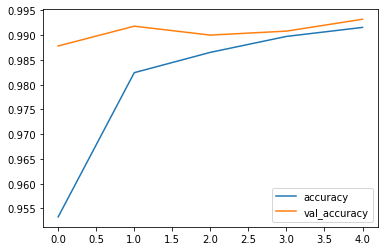

In [84]:
model1_df[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

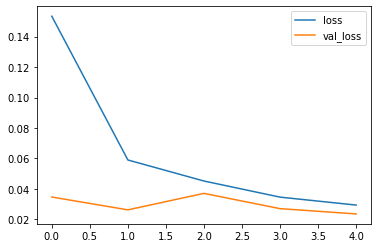

In [85]:
model1_df[['loss','val_loss']].plot()

In [86]:
pred=model1.predict(shaped_x_test)
pred=pred.argmax(axis=1)

In [87]:
import tensorflowjs as tfjs
tfjs_dir=r"C:\Users\shash\notebooks\project kaggale\Digit Recognizer\Web_digit_recognizer\js_model"
tfjs.converters.save_keras_model(model1,tfjs_dir)

## Evaluating model

In [88]:
from sklearn import metrics

In [89]:
metrics.accuracy_score(y_test,pred)

0.9932

In [90]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [109]:
metrics.confusion_matrix(y_test,pred)

array([[ 972,    0,    0,    0,    0,    1,    6,    1,    0,    0],
       [   0, 1129,    1,    2,    0,    0,    0,    3,    0,    0],
       [   2,    0, 1023,    0,    1,    0,    0,    6,    0,    0],
       [   0,    0,    1, 1005,    0,    2,    0,    0,    1,    1],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   0,    0,    1,    5,    0,  883,    2,    0,    1,    0],
       [   0,    2,    0,    0,    4,    1,  949,    0,    2,    0],
       [   0,    2,    0,    0,    0,    0,    0, 1025,    0,    1],
       [   1,    0,    2,    0,    1,    0,    0,    1,  968,    1],
       [   0,    0,    0,    0,    6,    2,    0,    2,    2,  997]],
      dtype=int64)

In [96]:
sig_pic=X_test[0].reshape(1,28,28,1)/255

In [97]:
model1.predict(sig_pic).argmax(axis=1)

array([7], dtype=int64)

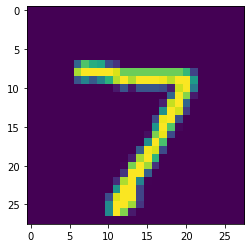

In [98]:
plt.imshow(X_test[0].reshape(28,28))

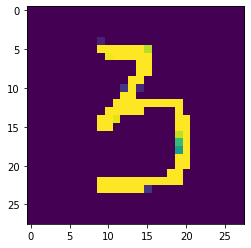

In [110]:
#testing with web drwan image
Web_img=tf.keras.preprocessing.image.load_img("download.png",color_mode = "grayscale",target_size=(28,28))
Web_array=tf.keras.preprocessing.image.img_to_array(Web_img)
plt.imshow(Web_array)

In [111]:
model1.predict(Web_array.reshape(1,28,28,1)/255).argmax(axis=1)

array([3], dtype=int64)